# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [51]:
!pip install citipy
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [52]:
# latitudes and longitudes
coordinates = list(lat_range)
coordinates

[-90, 90]

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
weather_api_key = 'cd1ec4d3bec889567a0b3ce9ccf46793'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [55]:
weather_api_key = 'cd1ec4d3bec889567a0b3ce9ccf46793'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# cities = []
city_data = []

city_url = url + "&q=" + city.replace(" ","+")

# Run an API request for one city
city_weather = requests.get(city_url).json()
# Parse out the max temp, humidity, and cloudiness
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_weather_description = city_weather["weather"][0]["description"]

# Append the City information into city_data list
city_data.append({"City": city.title(), 
                    "Lat": city_lat, 
                    "Lng": city_lng, 
                    "Max Temp": city_max_temp,
                    "Current Description": city_weather_description,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country})

print(city_data)

[{'City': 'Ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 33.46, 'Current Description': 'light snow', 'Humidity': 93, 'Cloudiness': 90, 'Wind Speed': 26.46, 'Country': 'AR'}]


In [56]:
city_weather

{'coord': {'lon': -68.3, 'lat': -54.8},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 33.46,
  'feels_like': 20.86,
  'temp_min': 33.46,
  'temp_max': 33.46,
  'pressure': 1005,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 26.46, 'deg': 70},
 'snow': {'1h': 0.11},
 'clouds': {'all': 90},
 'dt': 1626401562,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1626353225,
  'sunset': 1626381053},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [65]:
# List of city data
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Adding 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]       
        city_date_time = city_weather["dt"]
        
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                           "Date": city_date_time})
        
    # If an error is experienced, skip 
        time.sleep(1)
    except:
        print("City not found. Skipping...")
        pass 

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sikasso
Processing Record 2 of Set 1 | calipan
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | norwich
Processing Record 5 of Set 1 | ushtobe
Processing Record 6 of Set 1 | half moon bay
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | qui nhon
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | port keats
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | gat
Processing

Processing Record 188 of Set 1 | yellowknife
Processing Record 189 of Set 1 | omboue
Processing Record 190 of Set 1 | jizan
Processing Record 191 of Set 1 | mahebourg
Processing Record 192 of Set 1 | burica
City not found. Skipping...
Processing Record 193 of Set 1 | praia da vitoria
Processing Record 194 of Set 1 | hofn
Processing Record 195 of Set 1 | raglan
Processing Record 196 of Set 1 | ambon
Processing Record 197 of Set 1 | khatanga
Processing Record 198 of Set 1 | chaman
Processing Record 199 of Set 1 | upernavik
Processing Record 200 of Set 1 | qaanaaq
Processing Record 201 of Set 1 | zhigansk
Processing Record 202 of Set 1 | east london
Processing Record 203 of Set 1 | hualmay
Processing Record 204 of Set 1 | cartagena
Processing Record 205 of Set 1 | mwense
Processing Record 206 of Set 1 | rawson
Processing Record 207 of Set 1 | diego de almagro
Processing Record 208 of Set 1 | camacha
Processing Record 209 of Set 1 | abu dhabi
Processing Record 210 of Set 1 | fort thomas
Pr

Processing Record 371 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 372 of Set 1 | ponta do sol
Processing Record 373 of Set 1 | mecca
Processing Record 374 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 375 of Set 1 | ormara
Processing Record 376 of Set 1 | ochamchira
Processing Record 377 of Set 1 | havoysund
Processing Record 378 of Set 1 | cap malheureux
Processing Record 379 of Set 1 | saint-augustin
Processing Record 380 of Set 1 | sterling
Processing Record 381 of Set 1 | babushkin
Processing Record 382 of Set 1 | christchurch
Processing Record 383 of Set 1 | pokaran
Processing Record 384 of Set 1 | peniche
Processing Record 385 of Set 1 | champerico
Processing Record 386 of Set 1 | machiques
Processing Record 387 of Set 1 | hamilton
Processing Record 388 of Set 1 | mergui
City not found. Skipping...
Processing Record 389 of Set 1 | bilma
Processing Record 390 of Set 1 | terrace
Processing Record 391 of Set 1 | tevriz
Processing Record 

Processing Record 554 of Set 1 | labuan
Processing Record 555 of Set 1 | barcelos
Processing Record 556 of Set 1 | marabba
Processing Record 557 of Set 1 | sao joao da barra
Processing Record 558 of Set 1 | san pedro del pinatar
Processing Record 559 of Set 1 | daru
Processing Record 560 of Set 1 | black river
Processing Record 561 of Set 1 | garissa
Processing Record 562 of Set 1 | laguna
Processing Record 563 of Set 1 | pandan
Processing Record 564 of Set 1 | puerto penasco
Processing Record 565 of Set 1 | filingue
Processing Record 566 of Set 1 | okha
Processing Record 567 of Set 1 | balakhninskiy
Processing Record 568 of Set 1 | platteville
Processing Record 569 of Set 1 | antsohihy
Processing Record 570 of Set 1 | sarangani
Processing Record 571 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 572 of Set 1 | emerald
Processing Record 573 of Set 1 | galesong
Processing Record 574 of Set 1 | castries
Processing Record 575 of Set 1 | buala
Processing Record 576 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

city_data_df.count()

City                   566
Lat                    566
Lng                    566
Max Temp               566
Current Description    566
Humidity               566
Cloudiness             566
Wind Speed             566
Country                566
Date                   566
dtype: int64

In [67]:
len(city_data)

566

In [68]:
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sikasso,10.9167,-7.0000,75.00,broken clouds,83,77,4.27,ML,1626404393
1,Calipan,18.2958,-97.1667,65.95,broken clouds,90,64,4.07,MX,1626404395
2,Dikson,73.5069,80.5464,34.65,overcast clouds,96,100,13.15,RU,1626404396
3,Norwich,52.6278,1.2983,57.47,overcast clouds,89,90,4.61,GB,1626404235
4,Ushtobe,45.2514,77.9838,68.09,overcast clouds,63,100,16.08,KZ,1626404398
...,...,...,...,...,...,...,...,...,...,...
561,Marfino,55.7028,37.3822,69.87,clear sky,100,0,4.47,RU,1626405123
562,San Patricio,28.0170,-97.5169,84.09,overcast clouds,80,93,14.38,US,1626405124
563,Kattivakkam,13.2167,80.3167,86.09,overcast clouds,78,100,9.66,IN,1626405126
564,Novikovo,51.1537,37.8879,68.18,light rain,90,81,3.00,RU,1626405127


In [69]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,18.903794,14.370371,69.993216,71.477032,53.197880,7.890636,1.626405e+09
std,32.793915,90.217199,13.103198,20.136754,40.764765,5.880858,2.182647e+02
min,-54.800000,-175.200000,33.460000,11.000000,0.000000,0.000000,1.626404e+09
25%,-8.134500,-64.736350,59.695000,60.250000,6.000000,3.440000,1.626405e+09
50%,22.641700,20.304700,72.365000,77.000000,58.000000,6.210000,1.626405e+09
75%,45.955925,89.794250,80.335000,86.000000,98.000000,10.955000,1.626405e+09
max,78.218600,179.316700,94.240000,100.000000,100.000000,31.650000,1.626405e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

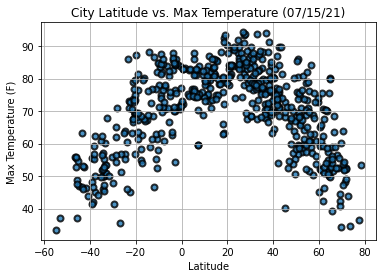

In [86]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

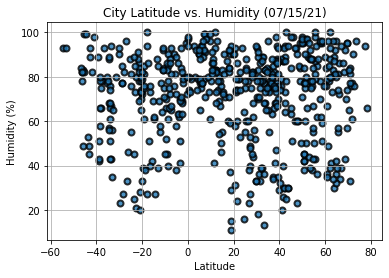

In [85]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

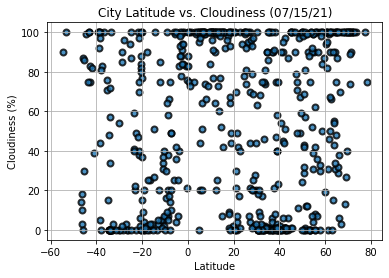

In [87]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

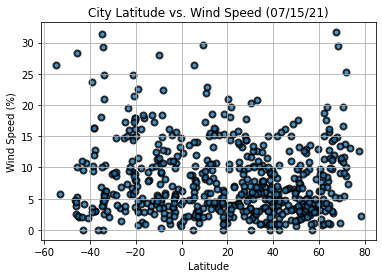

In [88]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=2, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


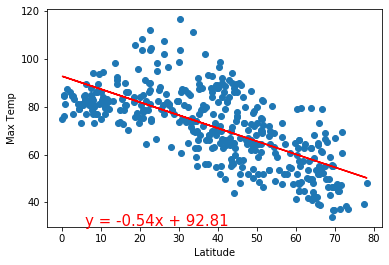

In [25]:
# Look like:

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


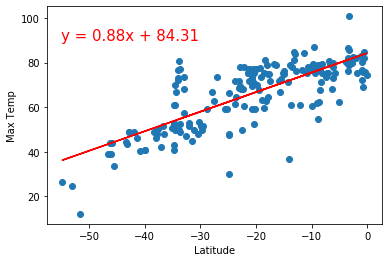

In [26]:
# Look like:

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


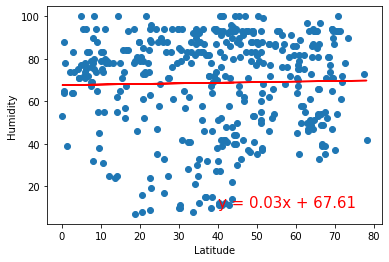

In [27]:
# Look like:

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


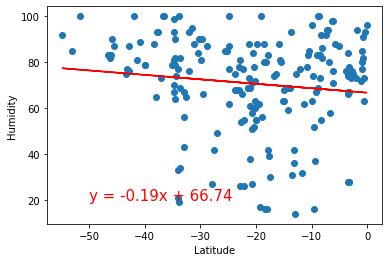

In [28]:
# Look like:

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


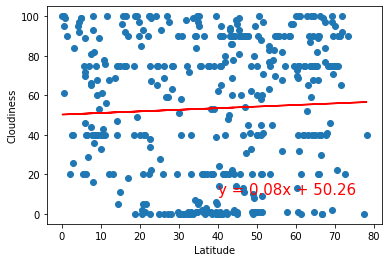

In [29]:
# Look like:

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


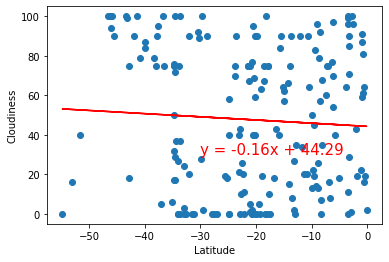

In [30]:
# Look like:

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


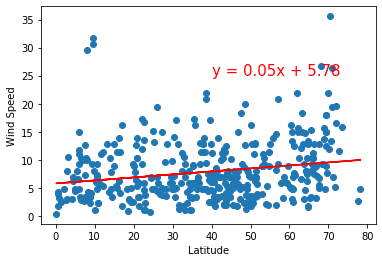

In [31]:
# Look like:

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


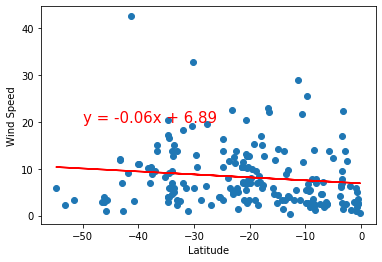

In [32]:
# Look like: